## _PRODIGY INFOTECH Data Science Internship - Task 3: Decision Tree Classifier_

### TASK: Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

### Importing the neccesary modules

In [5]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Loading the Data set

In [6]:
df = pd.read_csv('bank-additional-full.csv', delimiter = ';')
df.rename(columns = {'y':'deposit'},inplace = True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [8]:
df.shape

(41188, 21)

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [10]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [11]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Data Cleaning and Data Preprocessing

In [13]:
#Handling Duplicate values
df.duplicated().sum()

np.int64(12)

In [14]:
#Handling Null/Missing values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

### Extracting Numerical and Categorical Columns

In [15]:
cat_cols = df.select_dtypes(include = 'object').columns
print(cat_cols)
num_cols = df.select_dtypes(exclude = 'object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


### Descriptive Statistical Analysis

In [16]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [17]:
df.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


### Exploratory Data Analysis (EDA)

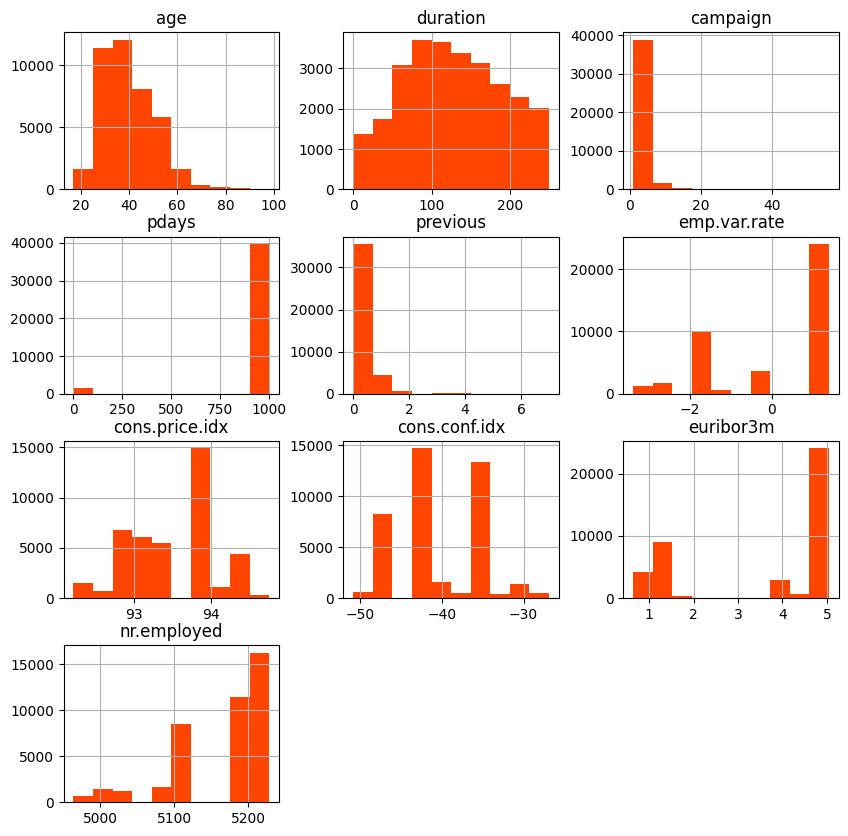

In [36]:
#Visualizing Numerical Columns using Histplot
df.hist(figsize=(10,10), color = 'orangered')
plt.show()

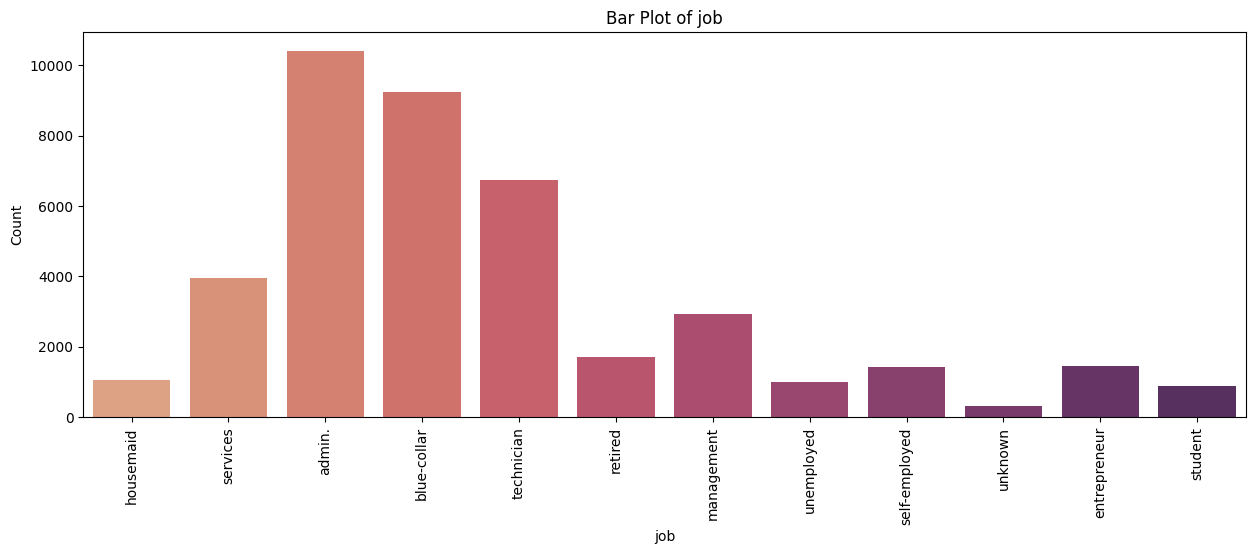

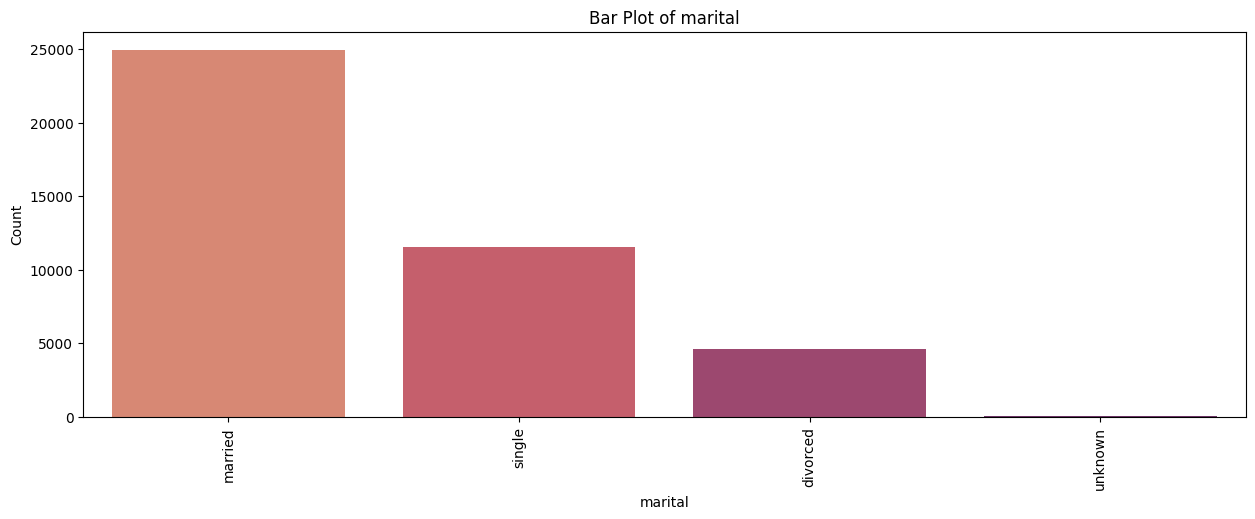

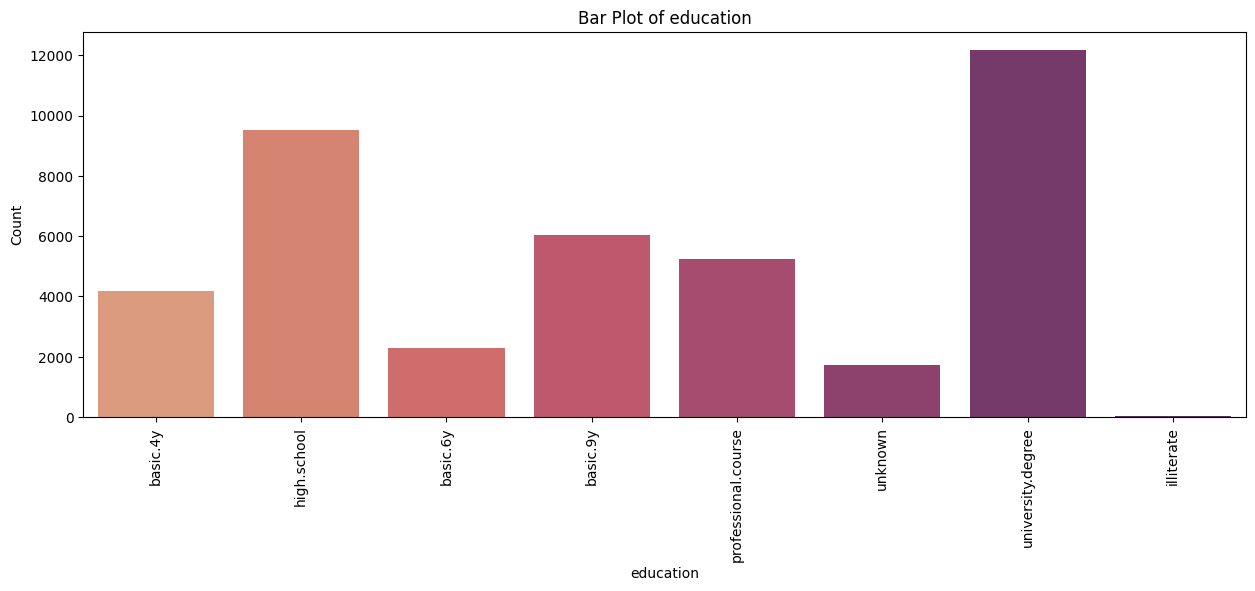

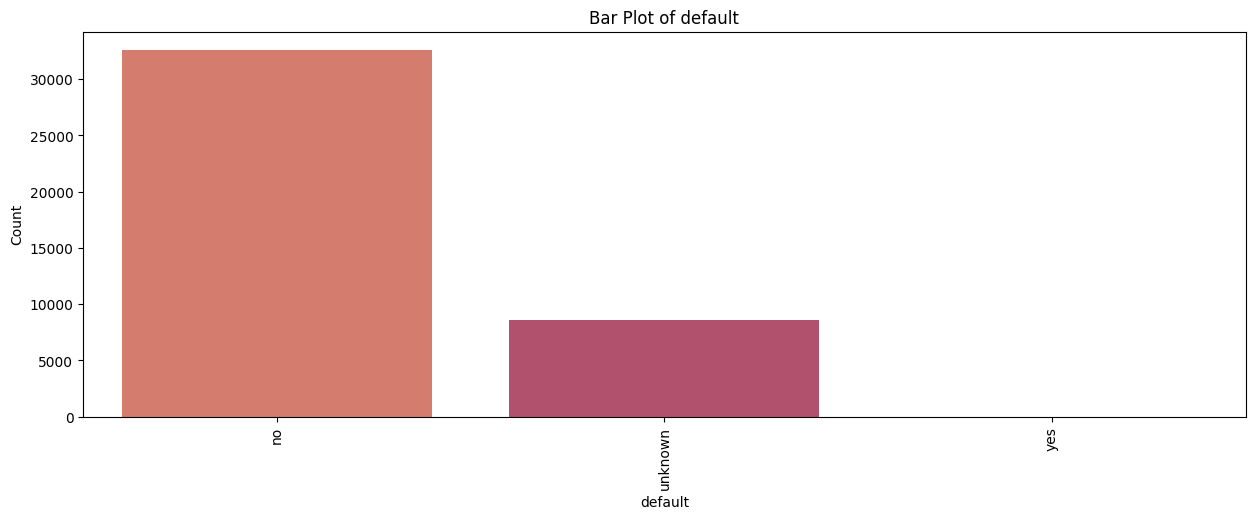

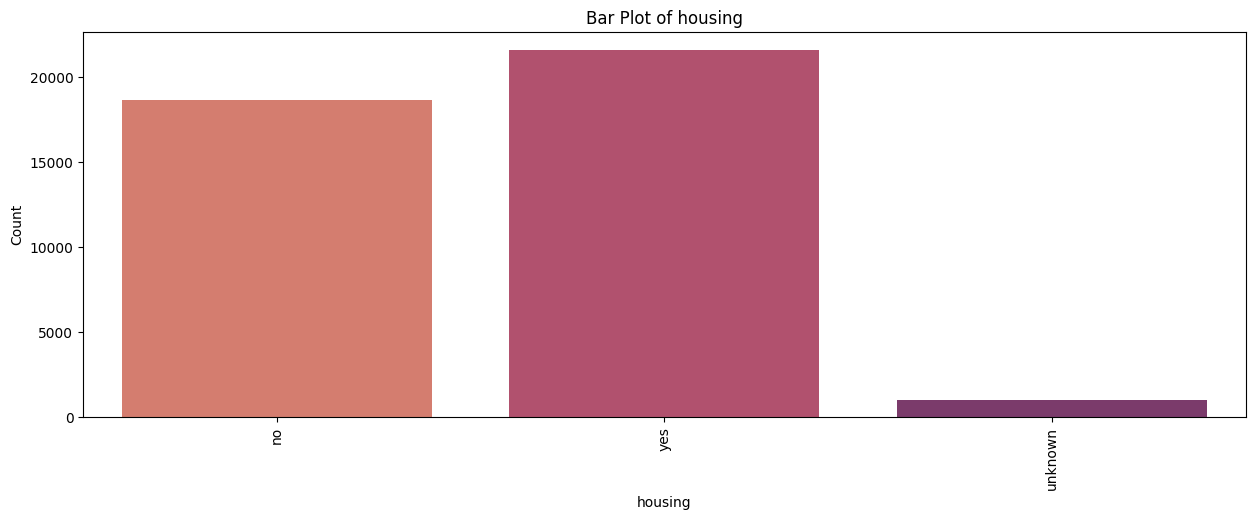

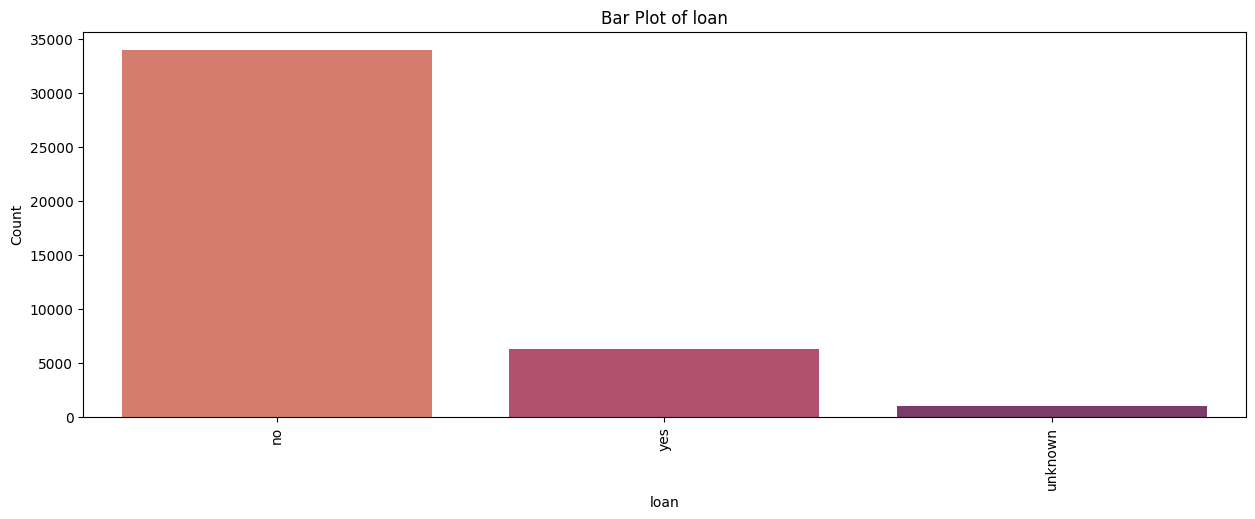

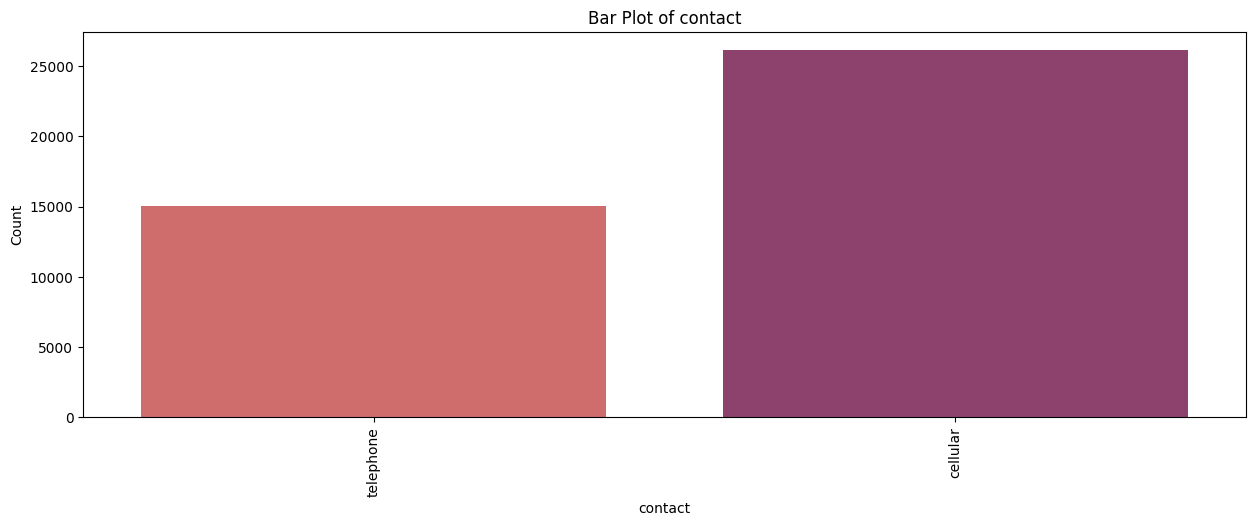

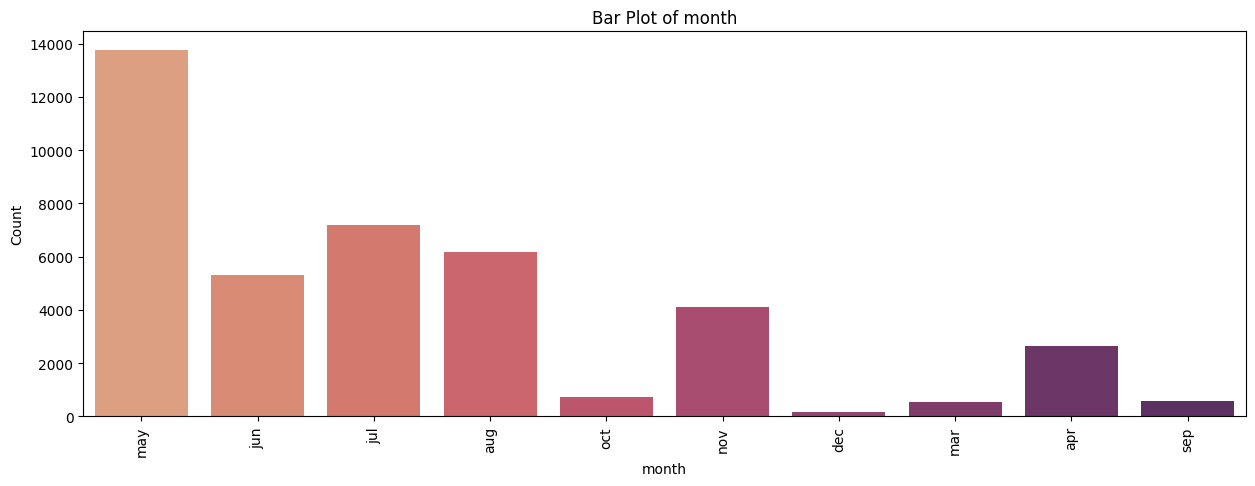

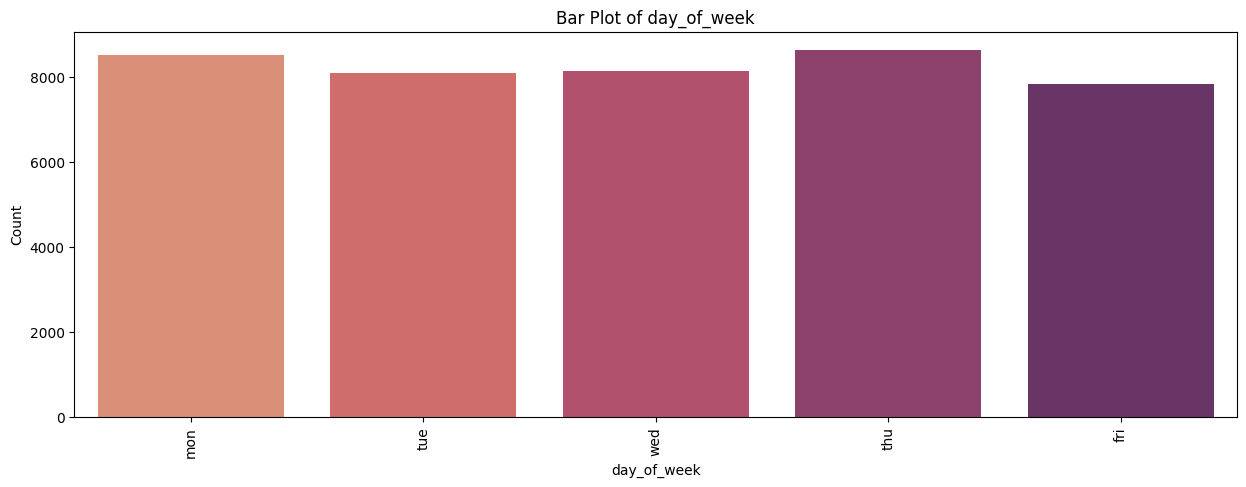

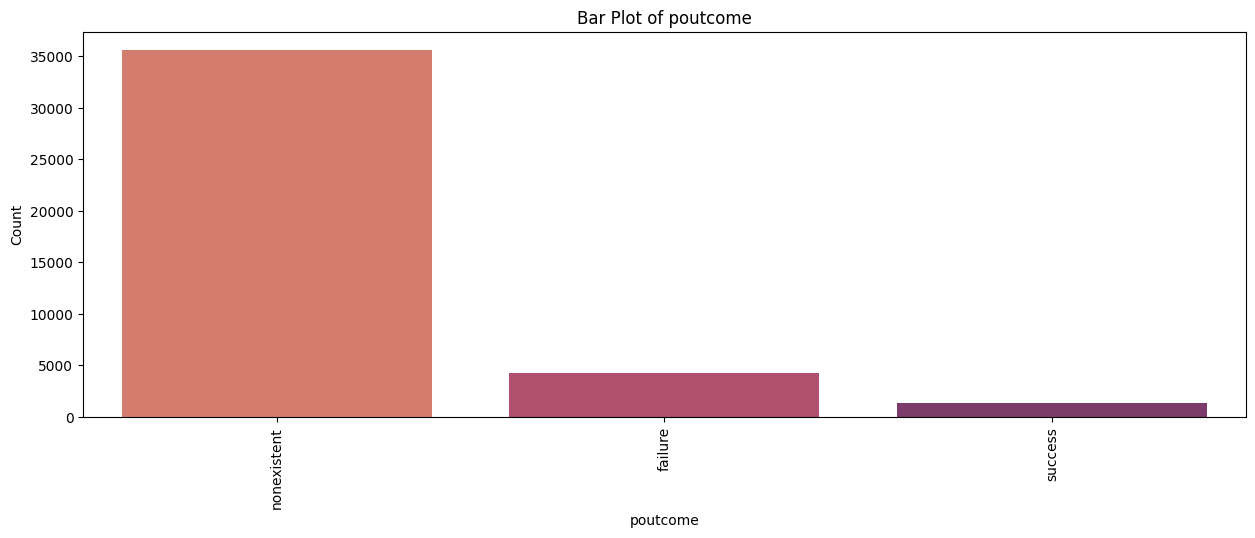

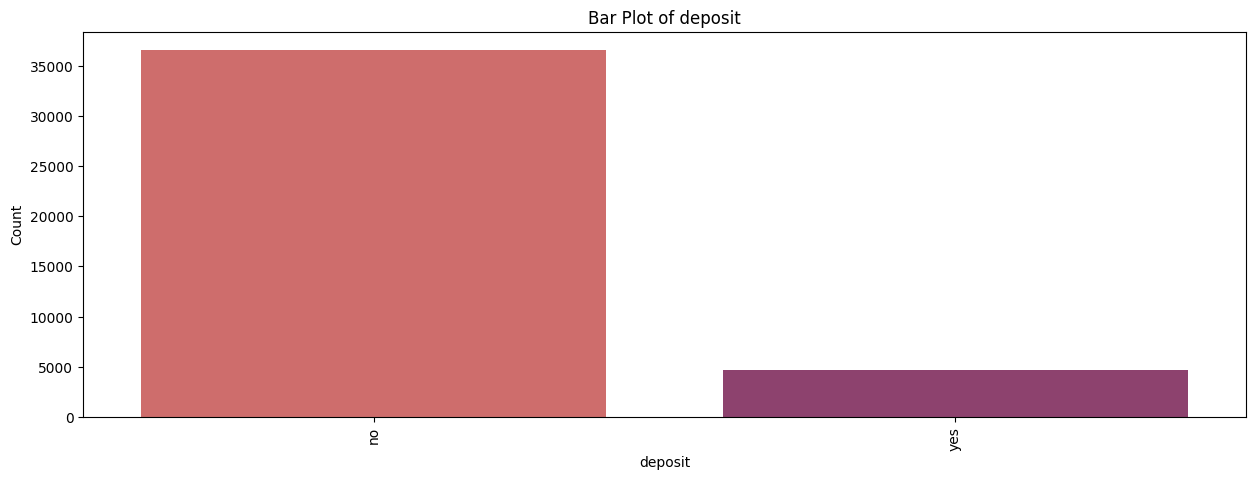

In [37]:
#Visualizing Categorial Data using Barplot

for feature in cat_cols:
    plt.figure(figsize=(15,5))
    sns.countplot(x = feature, data = df, palette = 'flare')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.show()

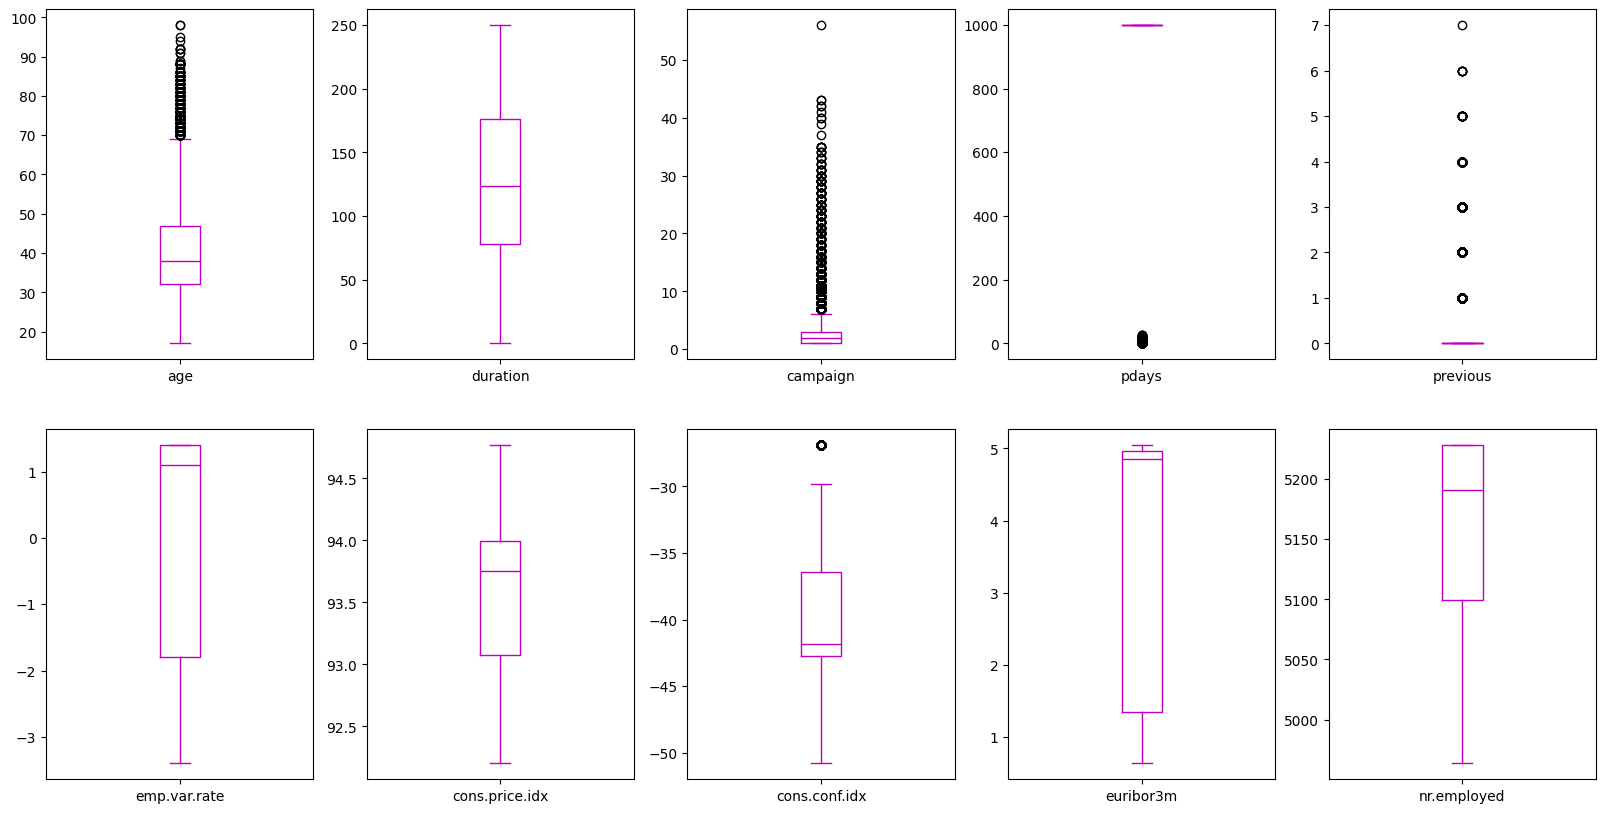

In [38]:
#Plotting Boxplot and Checking for outliners

df.plot(kind = 'box',subplots = True,layout = (2,5),figsize = (20,10),color = 'm')
plt.show()

In [21]:
#Removing Outliers 

column = df[['age','campaign','duration']]
q1 = np.quantile(column,0.25)
q3 = np.quantile(column,0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
print(iqr,upper_bound,lower_bound)
df[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]

99.0 250.5 -145.5


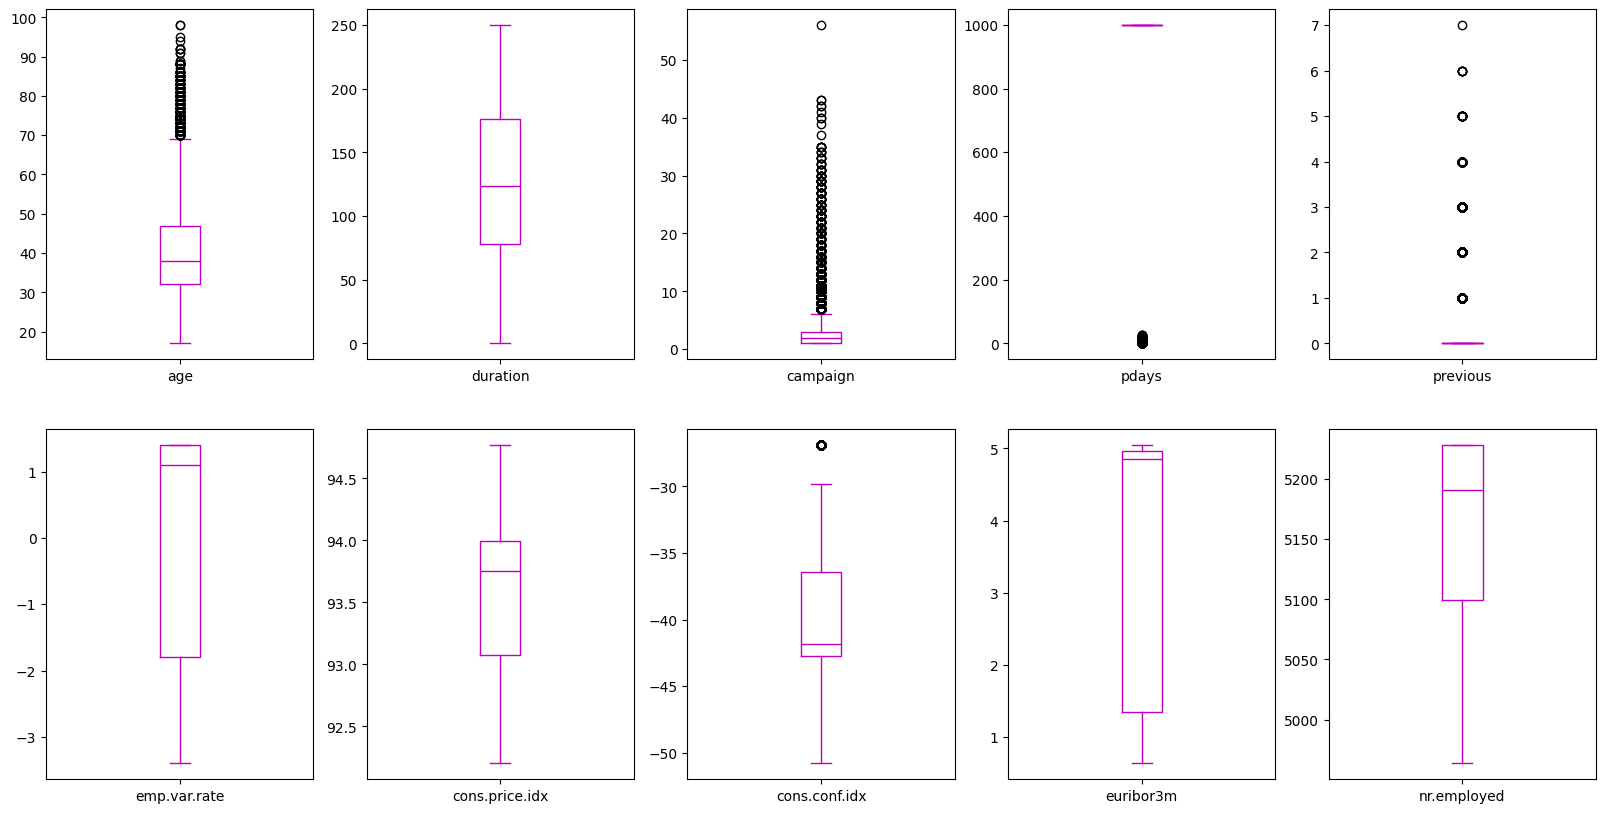

In [39]:
#Plotting Boxplot after removing outliners

df.plot(kind = 'box',subplots = True,layout = (2,5),figsize = (20,10),color = 'm')
plt.show()

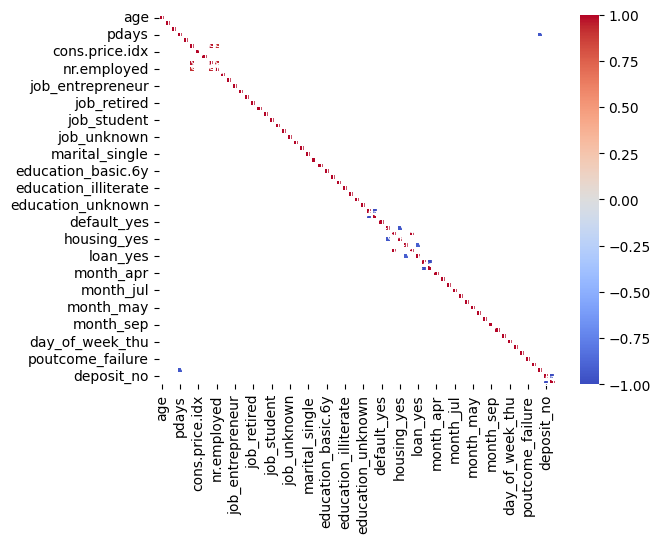

In [23]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df)

# Calculate correlation
corr = df_encoded.corr()

# Filter out correlations below 0.90
high_corr = corr[abs(corr) >= 0.90]

# Plot the heatmap
sns.heatmap(high_corr, annot=True, cmap='coolwarm', linewidths=0.2)
plt.show()

In [24]:
#Feature selection using Correlation
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [25]:
df1 = df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [26]:
df1.drop(high_corr_cols,inplace = True,axis = 1)
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'deposit'],
      dtype='object')

In [27]:
df1.shape

(41188, 18)

### Label Encoding

In [28]:
#Coversion of catogorial columns into numerical columns using label encoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,deposit
0,39,3,1,0,0,0,0,1,6,1,251,0,26,0,1,18,16,0
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,18,16,0
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,18,16,0
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,18,16,0
4,39,7,1,3,0,0,2,1,6,1,251,0,26,0,1,18,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56,5,1,5,0,2,0,0,7,0,251,0,26,0,1,25,0,1
41184,29,1,1,5,0,0,0,0,7,0,251,0,26,0,1,25,0,0
41185,39,5,1,6,0,2,0,0,7,0,189,1,26,0,1,25,0,0
41186,27,9,1,5,0,0,0,0,7,0,251,0,26,0,1,25,0,1


In [29]:
df_encoded['deposit'].value_counts()

deposit
0    36548
1     4640
Name: count, dtype: int64

In [30]:
#Selecting Independent and Dependent Variables

x = df_encoded.drop('deposit',axis = 1)
y = df_encoded['deposit']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(41188, 17)
(41188,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Training and Testing Dataset

In [31]:
from sklearn.model_selection import train_test_split
print(4119*0.25)

1029.75


In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25 , random_state = 1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30891, 17)
(10297, 17)
(30891,)
(10297,)


In [33]:
#Function to compute Confusion Matrix,Classification Report and to generate training and testing scores

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print("\nAccuracy Score : ",acc)
    cm = confusion_matrix(y_test,y_pred)
    print("\nConfusion Matrix : ",cm)
    print("\nClassification report\n",classification_report(y_test,y_pred))
    
def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print("\nTraining Score : ",train_score)
    print("\nTesting Score : ",test_score)

In [34]:
# Assuming fitted dt and dt1 models already
ypred_dt = dt.predict(x_test)
ypred_dt1 = dt1.predict(x_test)

# Evaluate model dt
print("Evaluation for Decision Tree (criterion='gini', max_depth=5, min_samples_split=10)")
eval_model(y_test, ypred_dt)
mscore(dt)

# Evaluate model dt1
print("Evaluation for Decision Tree (criterion='entropy', max_depth=4, min_samples_split=15)")
eval_model(y_test, ypred_dt1)
mscore(dt1)


NameError: name 'dt' is not defined

### Decision Tree Classifier

In [ ]:
#Importing Decision tree Library
from sklearn.tree import DecisionTreeClassifier

#Building Decision Tree Classifier Model
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [ ]:
DecisionTreeClassifier(max_depth=5, min_samples_split=10)


DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [ ]:
#Evaluating Training and Testing Accuracy
mscore(dt)



Training Score :  0.9148591777274199

Testing Score :  0.8990291262135922


In [ ]:
#Generating Predictions
ypred_dt = dt.predict(x_test)
print(ypred_dt)


[0 0 1 ... 0 0 0]


In [ ]:
#Evaluate the Model ---- Confusion Matrix , Classification report , Accuracy
eval_model(y_test,ypred_dt)



Accuracy Score :  0.8990291262135922

Confusion Matrix :  [[905  25]
 [ 79  21]]

Classification report
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       930
           1       0.46      0.21      0.29       100

    accuracy                           0.90      1030
   macro avg       0.69      0.59      0.62      1030
weighted avg       0.87      0.90      0.88      1030



In [ ]:
#Plotting Decision Tree
from sklearn.tree import plot_tree

cn = ['no','yes'] #class names
fn = x_train.columns #feature names
print(cn)
print(fn)


['no', 'yes']
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')


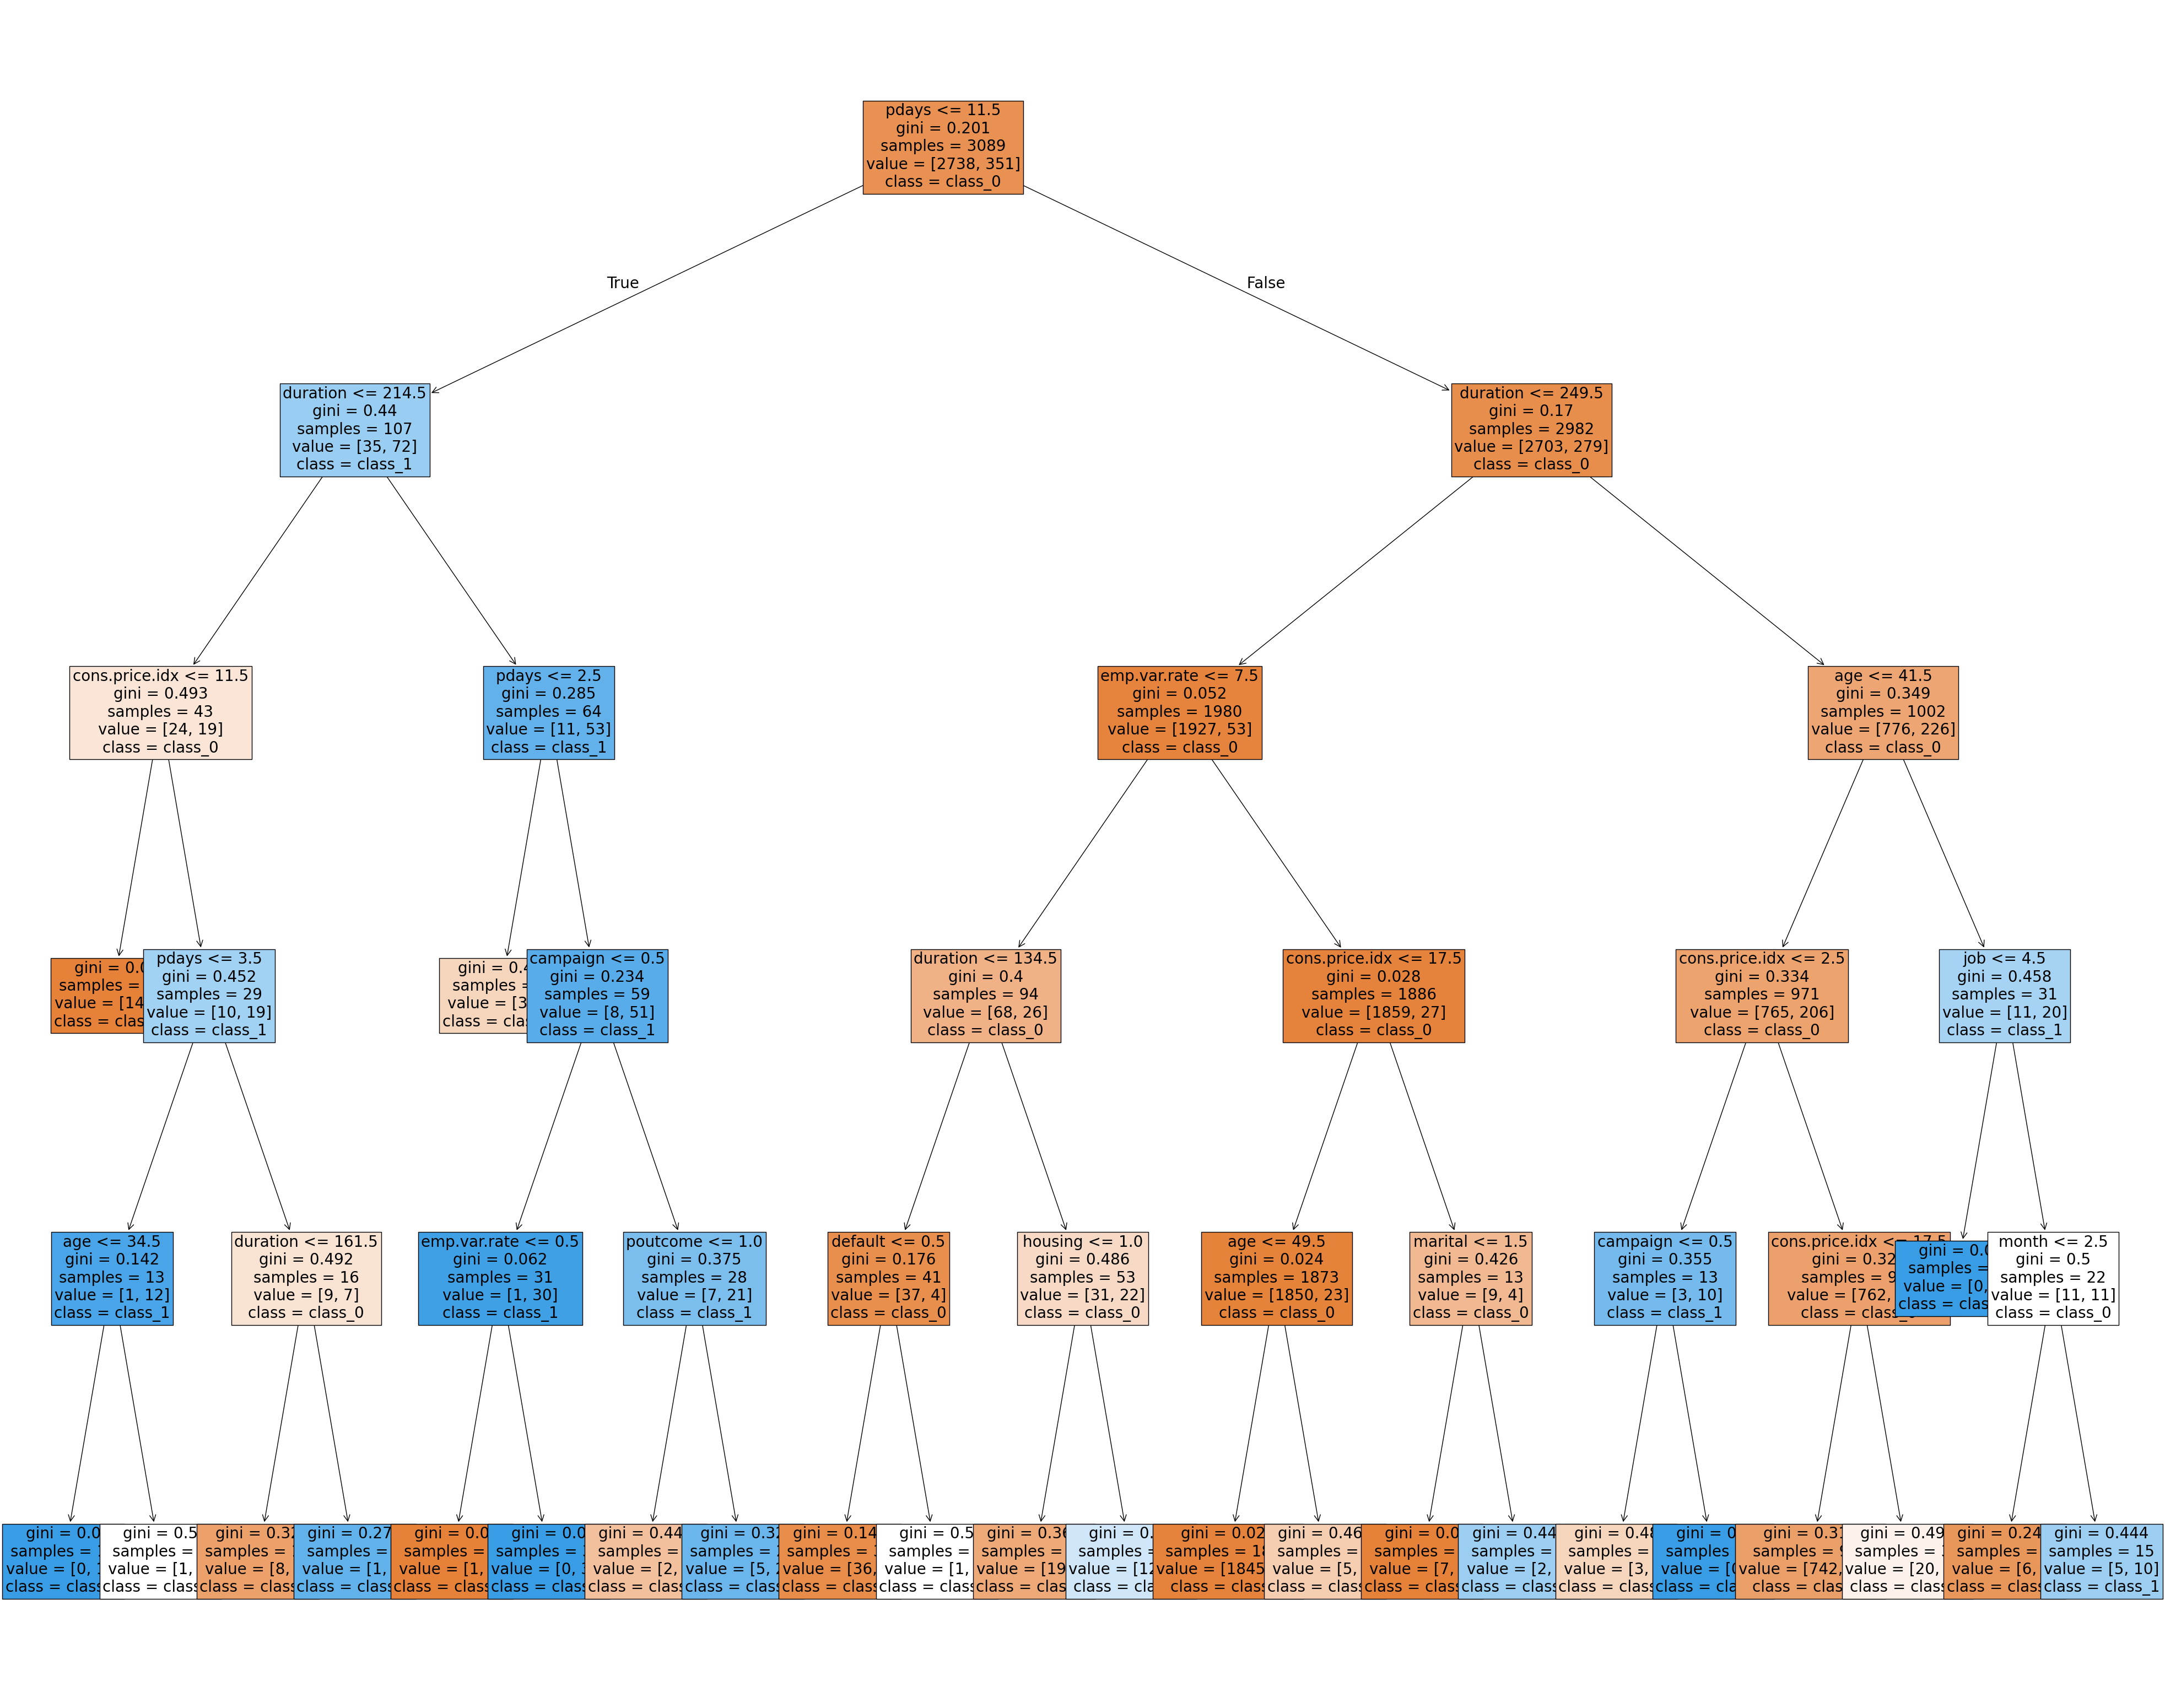

In [ ]:
feature_names = df.columns.tolist()
class_names = ["class_0","class_1"]
plt.figure(figsize = (50,40))
plot_tree(dt,feature_names=feature_names,class_names=class_names,filled = True,fontsize = 20)
plt.show()


### Decision Tree Classifier 2 (using Entropy Criteria)

In [ ]:
#Building Decision Tree Classifier Model
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [ ]:
#Evaluating Training and Testing Accuracy
mscore(dt1)


Training Score :  0.9080608611201036

Testing Score :  0.9048543689320389


In [ ]:
#Generating Predictions
ypred_dt1 = dt1.predict(x_test)
print(ypred_dt1)

[0 0 1 ... 0 0 0]


In [ ]:
#Evaluate the Model ---- Confusion Matrix , Classification report , Accuracy
eval_model(y_test,ypred_dt1)


Accuracy Score :  0.9048543689320389

Confusion Matrix :  [[915  15]
 [ 83  17]]

Classification report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       930
           1       0.53      0.17      0.26       100

    accuracy                           0.90      1030
   macro avg       0.72      0.58      0.60      1030
weighted avg       0.88      0.90      0.88      1030



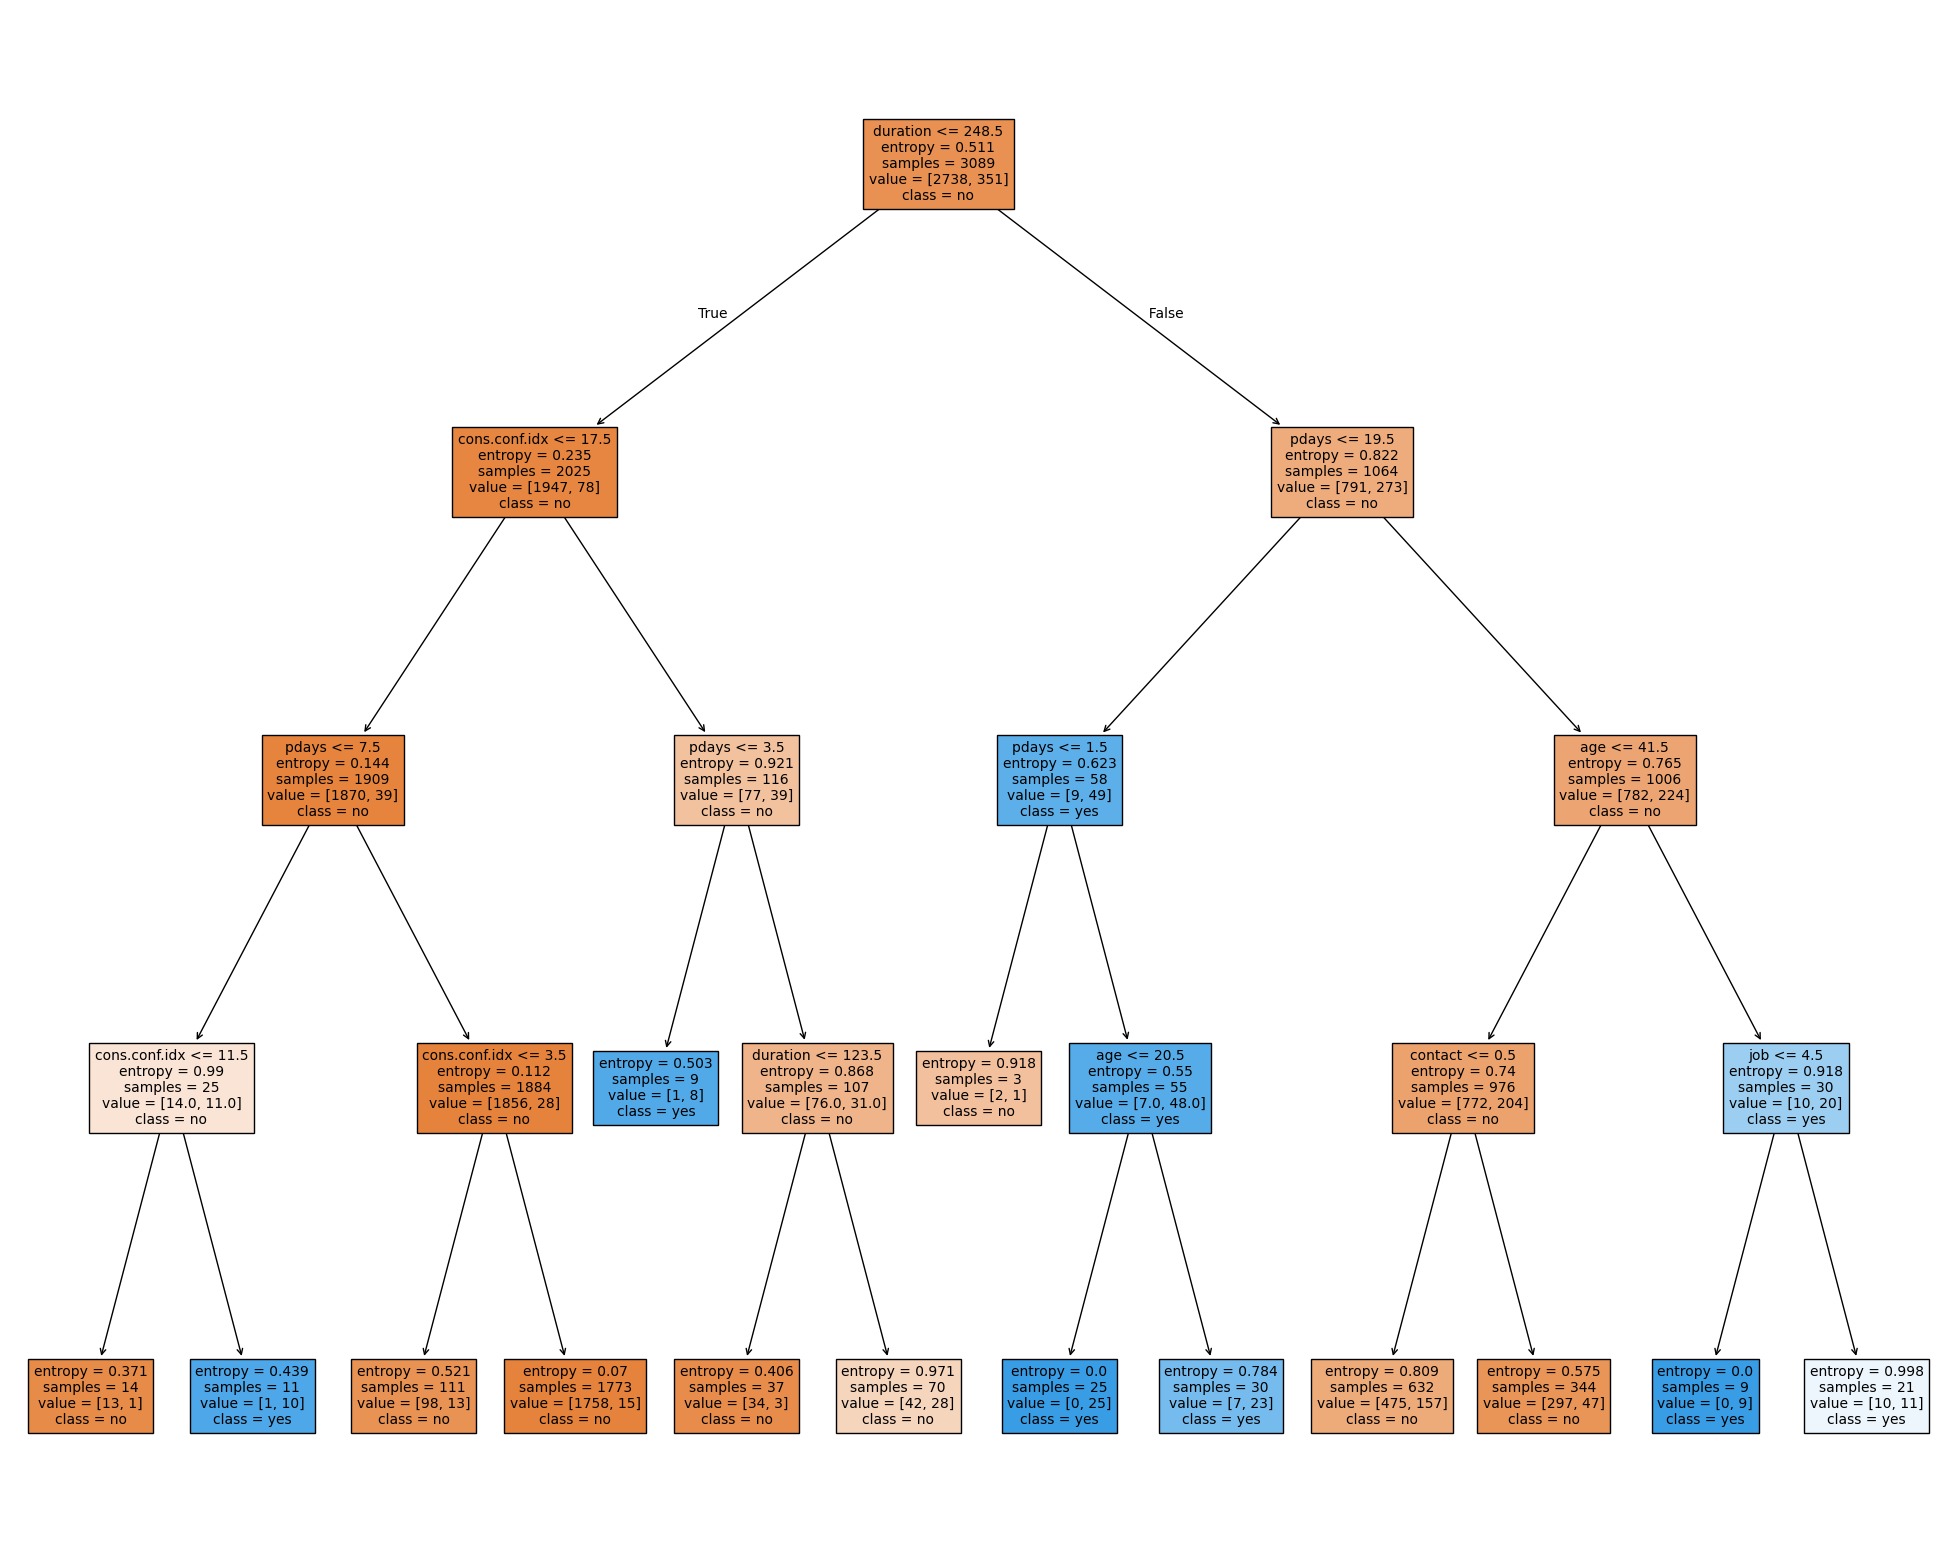

In [ ]:
#Plotting Decision classifier tree
plt.figure(figsize = (25,20))
plot_tree(dt1,feature_names=fn.tolist(),class_names=cn,filled = True,fontsize = 10)
plt.show()